In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sys
import random
import time
from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [32]:
def time_sleep():
    for i in range(5):
        time.sleep(1)
        print('.', end = '')
    print()

In [33]:
def gen_label(image):
    try:
        label = image.split('.')[-3]
    except:
        label = None
    finally:
        if label == 'cat':
            return [1, 0]
        elif label == 'dog':
            return [0, 1]
        else:
            return [0, 0]

In [34]:
def read_directory(**kwargs):
    array_of_img = []
    for filename in os.listdir(kwargs['directory_name']):
        #if (filename == '')
        label = gen_label(filename)
        img = cv2.imread(kwargs['directory_name'] + "/" + filename)
        if img is None:
            pass
        else:
            array_of_img.append([img, np.array(label)])
    
    return np.array(array_of_img)

In [35]:
def display_one(a, title1 = "Original"):
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def display(a, b, c, title1 = "Original", title2 = "Edited"):
    if c[0] == 1:
        print('This is a cat')
    if c[1] == 1:
        print('This is a dog')
    plt.subplot(121)
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(b)
    plt.title(title2)
    plt.show()

In [36]:
## 1. read datas that each data has three-dimension (height, width, RGB)

#print(os.path.abspath('.'))

print('----------------------------')
print('cats train_data loading', end = '')
train_cat = read_directory(directory_name = 'image/dataset/training_set/cats')
#data = read_directory(array_image = array_of_img, directory_name = '/Users/mac08/tool/dataset/training_set/cats')
time_sleep()
print('train_cat memory:  {} kb'. format(sys.getsizeof(train_cat) / 1000))
print('----------------------------')
print('dogs train_data loading', end = '')
train_dog = read_directory(directory_name = 'image/dataset/training_set/dogs')
time_sleep()
print('train_dog memory:  {} kb'. format(sys.getsizeof(train_dog) / 1000))
print('----------------------------')
print('cats test_data loading', end = '')
test_cat = read_directory(directory_name = 'image/dataset/test_set/cats')
time_sleep()
print('test_cat memory:  {} kb'. format(sys.getsizeof(test_cat) / 1000))
print('----------------------------')
print('dogs test_data loading', end = '')
test_dog = read_directory(directory_name = 'image/dataset/test_set/dogs')
time_sleep()
print('test_dog memory:  {} kb'. format(sys.getsizeof(test_dog) / 1000))
print('----------------------------')
print('clean memeory space')

----------------------------
cats train_data loading.....
train_cat memory:  64.112 kb
----------------------------
dogs train_data loading.....
train_dog memory:  64.112 kb
----------------------------
cats test_data loading.....
test_cat memory:  16.112 kb
----------------------------
dogs test_data loading.....
test_dog memory:  16.112 kb
----------------------------
clean memeory space


In [37]:
#Merge the cat and dog data to train_data, test_data
train_data = np.vstack((train_cat, train_dog))
test_data = np.vstack((test_cat, test_dog))

In [38]:
print(train_data.shape)
print(test_data.shape)
#random.shuffle(train_data[:, 0])
#random.shuffle(test_data[:, 0])

(8000, 2)
(2000, 2)


In [39]:
## 3. distribution train, valid and test data
train_image, train_label = (train_data[:, 0], train_data[:, 1])
valid_image, valid_label = (test_data[:1500, 0], test_data[:1500, 1])
test_image, test_label = (test_data[1500:, 0], test_data[1500:, 1])
print('train_image shape: ',train_image.shape)
print('valid_image shape: ',valid_image.shape)
print('test_image shape: ',test_image.shape)
print('train_label shape: ',train_label.shape)
print('valid_label shape: ',valid_label.shape)
print('test_label shape: ',test_label.shape)

train_image shape:  (8000,)
valid_image shape:  (1500,)
test_image shape:  (500,)
train_label shape:  (8000,)
valid_label shape:  (1500,)
test_label shape:  (500,)


In [40]:
#release memory space
train_cat = None
train_dog = None
train_data = None
test_cat = None
test_dog = None
test_data = None

In [41]:
## 2. resize each data
def processing(data, lab):
    #img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    
    print('The Second Original size', data[1].shape)
    height = 100
    width = 100
    dim = (width, height)
    res_img = []
    res_lab = []
    for i in range(len(data)):
        res = cv2.resize(data[i], dim, interpolation = cv2.INTER_LINEAR)
        res_img.append(res)
        res_lab.append(lab[i])
        
    print("The Second Resized size", res_img[1].shape)
    resized = res_img[1]
    relab = res_lab[1]
    display(data[1], resized, relab, 'Originial', 'Resized')
    return np.array(res_img), np.array(res_lab)

The Second Original size (499, 489, 3)
The Second Resized size (100, 100, 3)
This is a cat


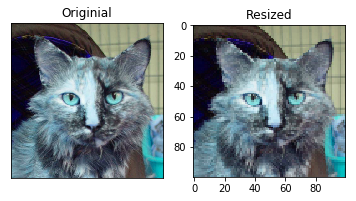

The Second Original size (499, 375, 3)
The Second Resized size (100, 100, 3)
This is a cat


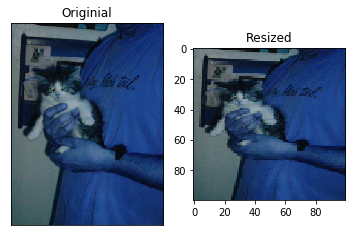

The Second Original size (374, 500, 3)
The Second Resized size (100, 100, 3)
This is a dog


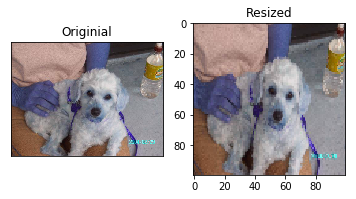

In [42]:
train_image, train_label = processing(train_image, train_label)
valid_image, valid_label = processing(valid_image, valid_label)
test_image, test_label = processing(test_image, test_label)

In [43]:
def use_memory(**kwargs):
    print('train_image use memory {} Mb'. format(sys.getsizeof(kwargs['train_image']) / 1000 / 1000))
    print('train_label use memory {} kb'. format(sys.getsizeof(kwargs['train_label']) / 1000))
    print('valid_image use memory {} Mb'. format(sys.getsizeof(kwargs['valid_image']) / 1000 / 1000))
    print('valid_label use memory {} kb'. format(sys.getsizeof(kwargs['valid_label']) / 1000))
    print('test_image use memory {} Mb'. format(sys.getsizeof(kwargs['test_image']) / 1000 / 1000))
    print('test_label use memory {} kb'. format(sys.getsizeof(kwargs['test_label']) / 1000))
    #mem = sys.getsizeof(kwargs['train_image']) + sys.getsizeof(kwargs['train_label'] + sys.getsizeof(kwargs['valid_image']  + sys.getsizeof(kwargs['valid_label']) + sys.getsizeof(kwargs['test_image']) + sys.getsizeof(kwargs['test_label'])
    #print('Total use memory {} Mb'. format(mem / 1000 / 1000))

In [44]:
def normalization(data):
    data = data / 255.
    return data

In [45]:
use_memory(train_image = train_image, 
                  train_label = train_label, 
                  valid_image = valid_image, 
                  valid_label = valid_label, 
                  test_image = test_image, 
                  test_label = test_label)

train_image use memory 240.000144 Mb
train_label use memory 64.112 kb
valid_image use memory 45.000144 Mb
valid_label use memory 12.112 kb
test_image use memory 15.000144 Mb
test_label use memory 4.112 kb


In [46]:
train_image = normalization(train_image)
valid_image = normalization(valid_image)
test_image = normalization(test_image)

In [74]:
#config.gpu_options.per_process_gpu_memory_fraction = 0.1
class CnnClassification:
    def __init__(self, n_images, n_labels, learning_rate, alpha, dropout_ratio, activation, config):
        self.n_images = n_images
        self.n_labels = n_labels
        self.weights = None
        self.biases = None
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.dropout_ratio = dropout_ratio
        self.activation = activation
        self.config = config
        self.graph = tf.Graph()
        self.config.gpu_options.allow_growth = True
        self.sess = tf.Session(graph = self.graph, config = self.config)
        self.build()
    
    def build(self):
        with self.graph.as_default():
            self.train_images = tf.placeholder(tf.float32, [None] + self.n_images)
            self.train_labels = tf.placeholder(tf.int32, [None, self.n_labels])
            
            self._y, orig_loss = self.structure(images = self.train_images,
                                             labels = self.train_labels,
                                             train = True)
            regularization = tf.reduce_sum([tf.nn.l2_loss(w) for w in self.weights.values()]) \
                        / tf.reduce_sum([tf.size(w, out_type = tf.float32) for w in self.weights.values()])
            self.loss = orig_loss + self.alpha * regularization
            self.train_op = tf.train.GradientDescentOptimizer(self.learning_rate).minimize(self.loss)
            
            self.new_images = tf.placeholder(tf.float32, [None] + self.n_images)
            self.new_labels = tf.placeholder(tf.int32, [None, self.n_labels])
            
            self.new_y, new_orig_loss = self.structure(images = self.new_images,
                                                          labels = self.new_labels)
            self.new_loss = new_orig_loss + self.alpha * regularization
            self.init_op = tf.global_variables_initializer()
    
    def structure(self, images, labels, train = False):
        if (self.weights is None) or (self.biases is None):
            self.weights = {
                'conv1' : tf.Variable(tf.truncated_normal(shape = [5, 5, 3, 6], stddev = 0.1)),  # 100 - 5 + 1 = 96
                'conv3' : tf.Variable(tf.truncated_normal(shape = [5, 5, 6, 16], stddev = 0.1)), # 48 - 5 + 1 = 44
                'conv5' : tf.Variable(tf.truncated_normal(shape = [5, 5, 16, 81], stddev = 0.1)), # 22 - 5 + 1 = 18
                'fc8' : tf.Variable(tf.truncated_normal(shape = (9 * 9 * 81, 120), stddev = 0.1)),
                'fc9' : tf.Variable(tf.truncated_normal(shape = (120, 84), stddev = 0.1)),
                'fc10' : tf.Variable(tf.truncated_normal(shape = (84, self.n_labels), stddev = 0.1))
            }
            self.biases = {
                'conv1' : tf.Variable(tf.zeros([6])),
                'conv3' : tf.Variable(tf.zeros([16])),
                'conv5' : tf.Variable(tf.zeros([81])),
                'fc8' : tf.Variable(tf.zeros([120])),
                'fc9' : tf.Variable(tf.zeros([84])),
                'fc10' : tf.Variable(tf.zeros([self.n_labels]))
            }
            
        conv1 = self.get_conv_2d_layer(images,
                                                        self.weights['conv1'], self.biases['conv1'],
                                                        activation = self.activation)
            
        pool2 = tf.nn.max_pool(conv1,
                                             ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
            
        conv3 = self.get_conv_2d_layer(pool2,
                                                   self.weights['conv3'], self.biases['conv3'],
                                                   activation = self.activation)
            
        pool4 = tf.nn.max_pool(conv3,
                                             ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
            
        conv5 = self.get_conv_2d_layer(pool4,
                                                   self.weights['conv5'], self.biases['conv5'],
                                                   activation = self.activation)
            
        pool6 = tf.nn.max_pool(conv5,
                                             ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
            
        flatten7 = self.get_flatten_layer(pool6)
        if train:
            flatten7 = tf.nn.dropout(flatten7, keep_prob = 1 - self.dropout_ratio[0])
            
        fc8 = self.get_dense_layer(flatten7,
                                            self.weights['fc8'], self.biases['fc8'],
                                            activation = self.activation)
        if train:
            fc8 = tf.nn.dropout(fc8, keep_prob = 1 - self.dropout_ratio[1])
        fc9 = self.get_dense_layer(fc8,
                                            self.weights['fc9'], self.biases['fc9'],
                                            activation = self.activation)
        if train:
            fc9 = tf.nn.dropout(fc9, keep_prob = 1 - self.dropout_ratio[2])
            
        logits = self.get_dense_layer(fc9,
                                               self.weights['fc10'], self.biases['fc10'])
            
        _y = tf.nn.softmax(logits)
            
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = labels, logits = logits))
            
        return (_y, loss)
        
    def get_conv_2d_layer(self, input_layer, weight, bias, activation = None):
        strides = (1, 1)
        padding = 'VALID'
        x = tf.add(
                    tf.nn.conv2d(input_layer,
                                      weight,
                                      [1, strides[0], strides[1], 1],
                                      padding = padding), bias)
        if activation:
            x = activation(x)
            
        return x
    
    def get_flatten_layer(self, input_layer):
        shape = input_layer.get_shape().as_list()
        n = 1

        for s in shape[1:]:
            n *= s
        x = tf.reshape(input_layer, [-1, n])
        
        return x
    
    def get_dense_layer(self, input_layer, weight, bias, activation = None):
        x = tf.add(tf.matmul(input_layer, weight), bias)
        if activation:
            x = activation(x)
            
        return x
    
    def _check_array(self, ndarray):
        ndarray = np.array(ndarray)
        if len(ndarray) == 1:
            ndarray = np.reshape(ndarray, (1, ndarray))
            
        return ndarray
    
    def predict(self, x):
        x = self._check_array(x)
        return self.sess.run(self.new_y, feed_dict = {self.new_images : x})
    
    def evaluate(self, x, y):
        x = self._check_array(x)
        y = self._check_array(y)
        return self.sess.run(self.new_loss, feed_dict = {self.new_images : x, self.new_labels : y})  
    
    def accuracy(self, predictions, labels):
        return np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0]
    
    def fit(self, X, y, epochs = 10, validation_data = None, test_data = None, batch_size = 32):
        X = self._check_array(X)
        y = self._check_array(y)
        self.train_loss_list = []
        self.val_loss_list = []
        self.train_acc_list = []
        self.val_acc_list = []
        self.test_acc_list = []
        N = X.shape[0]
        random.seed(9000)
        
        self.sess.run(self.init_op)
        for epoch in range(epochs):
            print('Epoch [%d/%d]' % (epoch + 1, epochs))
            
            
            index = [i for i in range(N)]
            random.shuffle(index)
            while len(index) > 0:
                index_size = len(index)
                batch_index = [index.pop() for j in range(min(batch_size, index_size))]
                
                feed_dict = {
                    self.train_images : X[batch_index, :],
                    self.train_labels : y[batch_index]
                }
            
                _y, loss = self.sess.run([self.train_op, self.loss],  feed_dict = feed_dict)
                print('[%d/%d] loss = %9.4f      ' % (N - len(index), N, loss), end = '\r')
                
            train_y = self.predict(X)
            train_loss = self.evaluate(X, y)
            train_acc = self.accuracy(train_y, y)
            if epoch % 10 == 0:
                self.train_loss_list.append(train_loss)
                self.train_acc_list.append(train_acc * 100)
            print('loss = %8.4f, acc = %3.2f%%' % (train_loss, train_acc * 100))

            if validation_data:
                val_y = self.predict(validation_data[0])
                val_loss = self.evaluate(validation_data[0], validation_data[1])
                val_acc = self.accuracy(val_y, validation_data[1])
                if epoch % 10 == 0:
                    self.val_loss_list.append(val_loss)
                    self.val_acc_list.append(val_acc * 100)
                print('val loss = %8.4f, acc = %3.2f%%' % (val_loss, val_acc * 100))
        if test_data:
                test_y = self.predict(test_data[0])
                test_acc = self.accuracy(test_y, test_data[1])
                if epoch % 10 == 0:
                    self.test_acc_list.append(test_acc * 100)
                print('test_acc = %3.2f%%' % (test_acc * 100))
                
    def plot_loss_2(self):
        plt.plot(self.train_loss_list)
        plt.plot(self.val_loss_list)
        plt.title('Loss')
        plt.show()
        
    def plot_acc_2(self):
        plt.plot(self.train_acc_list)
        plt.plot(self.val_acc_list)
        plt.plot(self.test_acc_list)
        plt.title('Accuracy')
        plt.show()

In [75]:
print('train_image shape: ', train_image.shape)
print('valid_image shape: ', valid_image.shape)
print('test_image shape: ', test_image.shape)
print('train_label shape: ', train_label.shape)
print('valid_label shape: ', valid_label.shape)
print('test_label shape: ', test_label.shape)

train_image shape:  (8000, 100, 100, 3)
valid_image shape:  (1500, 100, 100, 3)
test_image shape:  (500, 100, 100, 3)
train_label shape:  (8000, 2)
valid_label shape:  (1500, 2)
test_label shape:  (500, 2)


In [83]:
model = CnnClassification(n_images = [100, 100, 3],
                                      n_labels = 2,
                                      learning_rate = 1e-3,
                                      alpha = 0.1,
                                      dropout_ratio = [0.3, 0.1, 0.05],
                                      activation = tf.nn.relu,
                                      config = ConfigProto())

In [88]:
model.fit(
        X = train_image,
        y = train_label,
        epochs = 300,
        validation_data = (valid_image, valid_label),
        test_data = (test_image, test_label),
        batch_size = 32)

Epoch [1/300]
loss =   0.6888, acc = 52.12%     
val loss =   0.7167, acc = 37.40%
Epoch [2/300]
loss =   0.6881, acc = 53.25%     
val loss =   0.7118, acc = 40.00%
Epoch [3/300]
loss =   0.6866, acc = 54.57%     
val loss =   0.7085, acc = 43.13%
Epoch [4/300]
loss =   0.6848, acc = 54.83%     
val loss =   0.7112, acc = 42.07%
Epoch [5/300]
loss =   0.6835, acc = 56.84%     
val loss =   0.7063, acc = 45.47%
Epoch [6/300]
loss =   0.6822, acc = 58.06%     
val loss =   0.7004, acc = 51.13%
Epoch [7/300]
loss =   0.6802, acc = 58.21%     
val loss =   0.7043, acc = 48.80%
Epoch [8/300]
loss =   0.6785, acc = 58.86%     
val loss =   0.7004, acc = 51.53%
Epoch [9/300]
loss =   0.6771, acc = 59.11%     
val loss =   0.7011, acc = 51.07%
Epoch [10/300]
loss =   0.6751, acc = 59.11%     
val loss =   0.7025, acc = 51.47%
Epoch [11/300]
loss =   0.6730, acc = 59.06%     
val loss =   0.7051, acc = 50.20%
Epoch [12/300]
loss =   0.6709, acc = 59.19%     
val loss =   0.7063, acc = 50.60%
E

loss =   0.5723, acc = 70.00%     
val loss =   0.6265, acc = 67.53%
Epoch [100/300]
loss =   0.5747, acc = 69.49%     
val loss =   0.6340, acc = 66.60%
Epoch [101/300]
loss =   0.5723, acc = 70.15%     
val loss =   0.6165, acc = 67.47%
Epoch [102/300]
loss =   0.5679, acc = 70.11%     
val loss =   0.6095, acc = 68.73%
Epoch [103/300]
loss =   0.5695, acc = 70.23%     
val loss =   0.6274, acc = 67.80%
Epoch [104/300]
loss =   0.5701, acc = 70.09%     
val loss =   0.6268, acc = 66.13%
Epoch [105/300]
loss =   0.5686, acc = 69.88%     
val loss =   0.6067, acc = 68.47%
Epoch [106/300]
loss =   0.5648, acc = 70.50%     
val loss =   0.6100, acc = 68.60%
Epoch [107/300]
loss =   0.5720, acc = 70.24%     
val loss =   0.6219, acc = 67.13%
Epoch [108/300]
loss =   0.5652, acc = 70.60%     
val loss =   0.6183, acc = 68.47%
Epoch [109/300]
loss =   0.5648, acc = 70.56%     
val loss =   0.6244, acc = 66.73%
Epoch [110/300]
loss =   0.5591, acc = 71.09%     
val loss =   0.5975, acc = 70.

loss =   0.4724, acc = 77.26%     
val loss =   0.5394, acc = 75.07%
Epoch [196/300]
loss =   0.4701, acc = 77.35%     
val loss =   0.5414, acc = 73.67%
Epoch [197/300]
loss =   0.4735, acc = 77.11%     
val loss =   0.5071, acc = 77.87%
Epoch [198/300]
loss =   0.4643, acc = 77.95%     
val loss =   0.5264, acc = 75.93%
Epoch [199/300]
loss =   0.4679, acc = 77.49%     
val loss =   0.5067, acc = 77.47%
Epoch [200/300]
loss =   0.4654, acc = 77.76%     
val loss =   0.5276, acc = 75.27%
Epoch [201/300]
loss =   0.4649, acc = 77.88%     
val loss =   0.5463, acc = 74.00%
Epoch [202/300]
loss =   0.4649, acc = 78.08%     
val loss =   0.5476, acc = 73.93%
Epoch [203/300]
loss =   0.4700, acc = 77.72%     
val loss =   0.5196, acc = 76.40%
Epoch [204/300]
loss =   0.4828, acc = 76.76%     
val loss =   0.5436, acc = 74.33%
Epoch [205/300]
loss =   0.4618, acc = 77.94%     
val loss =   0.5152, acc = 76.80%
Epoch [206/300]
loss =   0.4595, acc = 78.20%     
val loss =   0.5340, acc = 74.

loss =   0.3730, acc = 83.75%     
val loss =   0.5022, acc = 76.27%
Epoch [292/300]
loss =   0.3838, acc = 82.70%     
val loss =   0.4717, acc = 79.47%
Epoch [293/300]
loss =   0.3799, acc = 83.61%     
val loss =   0.5230, acc = 75.93%
Epoch [294/300]
loss =   0.3779, acc = 83.40%     
val loss =   0.5064, acc = 76.67%
Epoch [295/300]
loss =   0.3724, acc = 83.61%     
val loss =   0.5074, acc = 76.93%
Epoch [296/300]
loss =   0.3713, acc = 83.84%     
val loss =   0.5252, acc = 76.53%
Epoch [297/300]
loss =   0.3712, acc = 83.80%     
val loss =   0.5235, acc = 75.60%
Epoch [298/300]
loss =   0.3812, acc = 83.19%     
val loss =   0.5166, acc = 76.13%
Epoch [299/300]
loss =   0.3803, acc = 83.12%     
val loss =   0.5419, acc = 75.67%
Epoch [300/300]
loss =   0.3731, acc = 83.60%     
val loss =   0.4842, acc = 78.87%
test_acc = 69.00%


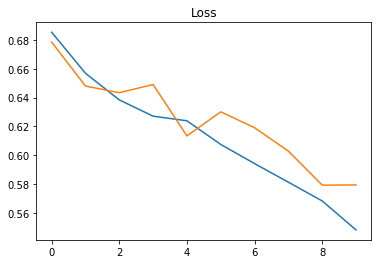

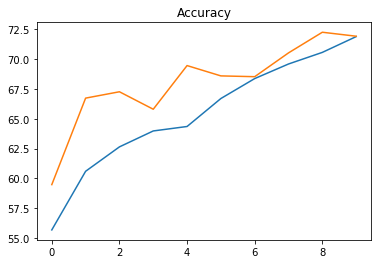

In [87]:
model.plot_loss_2()
model.plot_acc_2()

In [28]:
import gc
gc.collect()

6970

In [29]:
%reset -f